# 作业三

## 一、Python类

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class DummyData:
    def __init__(self, num=200):
        self.num = num
        
    def load_data(self, train=True):
        W = [0.3, 2, 1]
        if train:
            X = np.linspace(-2, 2, num=self.num)
            Y = W[0]*X**2 + W[1]*X + W[2] + 0.4*np.random.randn(X.size)
        else:
            X = np.linspace(-10, 10, num=self.num)
            Y = W[0]*X**2 + W[1]*X + W[2] + 5*np.random.randn(X.size)
        return X, Y

In [3]:
X_train, Y_train = DummyData(500).load_data()
X_valid, Y_valid = DummyData(200).load_data(train=False)

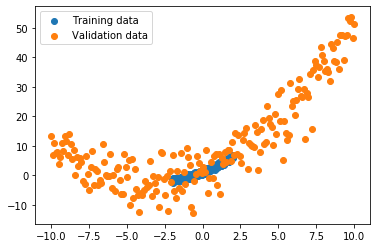

In [4]:
plt.scatter(X_train, Y_train)
plt.scatter(X_valid, Y_valid)
plt.legend(["Training data", "Validation data"])

# 拟合上述曲线

要求：

* 函数$ f(x) = w_0x^2 + w_1x + w_2 $
* 误差采用均方误差 $L := \frac{\sum_{i=1}^{n}(f(X_i) - Y_i)^2}{n}$
* 固定步长的梯度下降法
* 在尽可能不修改代码结构的前提下完成工作
* 利用`X_train, Y_train`拟合，利用`X_valid, Y_valid`来验证拟合的效果

## 定义模型、优化器及误差

In [5]:
# 只需要修改这一部分 -- 代码量在20行以内
class Parabola:
    def __init__(self):
        self.W = np.zeros(3)
        
    def __call__(self, X):
        return self.predict(X)
    
    def predict(self, X):
        """计算f(X)，X为向量"""
        assert len(X.shape)==1
        # 实现它
        raise(NotImplementedError())

        
class GradientDescent:
    def __init__(self, step=1e-3):
        self.step = step
        
    def update(self, f:Parabola, dW):
        """利用梯度dW来更新f的权重"""
        # 实现它
        raise(NotImplementedError())
        

def loss(predict, real):
    """计算预测值与真实值之间的误差 L"""
    assert len(real.shape)==1
    assert real.size == predict.size
    # 实现它
    raise(NotImplementedError())
    
    
def grad(f, X, Y):
    """计算L在X处的关于参数W的导数, 其中Y=f(X)， X、Y均为向量"""
    assert len(X.shape)==1
    # 实现它
    raise(NotImplementedError())

## 拟合模型

In [6]:
f = Parabola()
opt = GradientDescent(1e-3)

valid_losses = []
train_losses = []
for i in range(1000):
    X, Y = X_train, Y_train
    
    Y_out = f(X)
    dW = grad(f, X, Y)
    opt.update(f, dW)
    
    cur_valid_loss = loss(Y_valid, f(X_valid))
    cur_train_loss = loss(X, Y)
    valid_losses.append(cur_valid_loss) 
    train_losses.append(cur_train_loss)
    
    if i%50 == 0:
        print(f"Iter {i}: train loss {cur_train_loss}, valid loss {cur_valid_loss}")

Iter 0: train loss 3.5257341731728453, valid loss 365.37025960955447
Iter 50: train loss 3.5257341731728453, valid loss 219.89880296076953
Iter 100: train loss 3.5257341731728453, valid loss 151.61389222814907
Iter 150: train loss 3.5257341731728453, valid loss 126.87490123163272
Iter 200: train loss 3.5257341731728453, valid loss 125.62486008282609
Iter 250: train loss 3.5257341731728453, valid loss 136.09901414478577
Iter 300: train loss 3.5257341731728453, valid loss 151.55716306242542
Iter 350: train loss 3.5257341731728453, valid loss 168.27328247187322
Iter 400: train loss 3.5257341731728453, valid loss 184.30469988273796
Iter 450: train loss 3.5257341731728453, valid loss 198.74339251916714
Iter 500: train loss 3.5257341731728453, valid loss 211.26447909035429
Iter 550: train loss 3.5257341731728453, valid loss 221.8571273503185
Iter 600: train loss 3.5257341731728453, valid loss 230.6667984899287
Iter 650: train loss 3.5257341731728453, valid loss 237.90493845736563
Iter 700: t

## 显示结果

结果不好是正常的

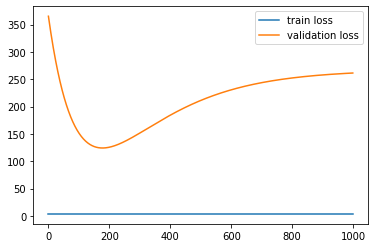

In [7]:
plt.plot(train_losses)
plt.plot(valid_losses)
plt.legend(["train loss", "validation loss"])

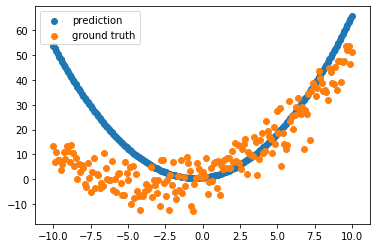

In [8]:
plt.scatter(X_valid, f(X_valid))
plt.scatter(X_valid, Y_valid)
plt.legend(["prediction", "ground truth"])